<a href="https://colab.research.google.com/github/kkharon/iS/blob/main/Task_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вариант 5

https://archive.ics.uci.edu/dataset/52/ionosphere

In [ ]:
!pip install ucimlrepo

In [ ]:
!pip install umap-learn

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=21a9c3dc825a301e0d603d2f91c6e59a09979367b12d14ca42368b690c9656ed
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler,  StandardScaler,  RobustScaler
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка датасета

In [ ]:
# fetch dataset
ionosphere = fetch_ucirepo(id=52)

# data (as pandas dataframes)
X = ionosphere.data.features
y = ionosphere.data.targets

X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [ ]:
y

,Class
0,g
1,b
2,g
3,b
4,g
...,...
346,g
347,g
348,g
349,g


In [ ]:
def plot(X):
  # Применение t-SNE
  tsne = TSNE(n_components=2)
  tsne_result = tsne.fit_transform(X)

  # Применение UMAP
  umap_result = umap.UMAP(n_components=2).fit_transform(X)

  # Визуализация результатов
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
  plt.title('t-SNE')

  plt.subplot(1, 2, 2)
  plt.scatter(umap_result[:, 0], umap_result[:, 1])
  plt.title('UMAP')

  plt.show()

Без применения масштабирования

## Визуализация в двухмерном пространстве набора данных без применения масштабирования

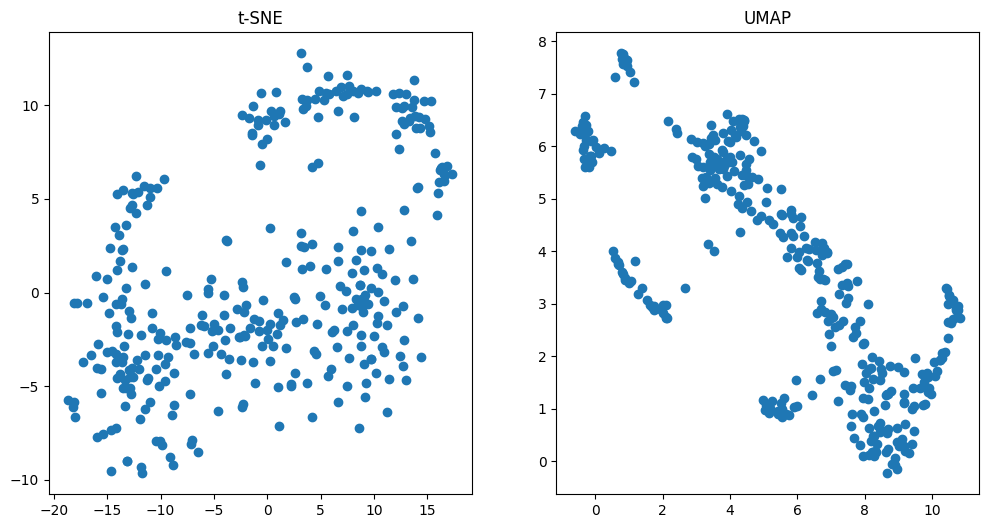

In [ ]:
plot(X)

## Визуализация в двухмерном пространстве набора данных с применением масштабирования

MinMax масштабирование

In [ ]:
mm = MinMaxScaler()

X_mm = mm.fit_transform(X)

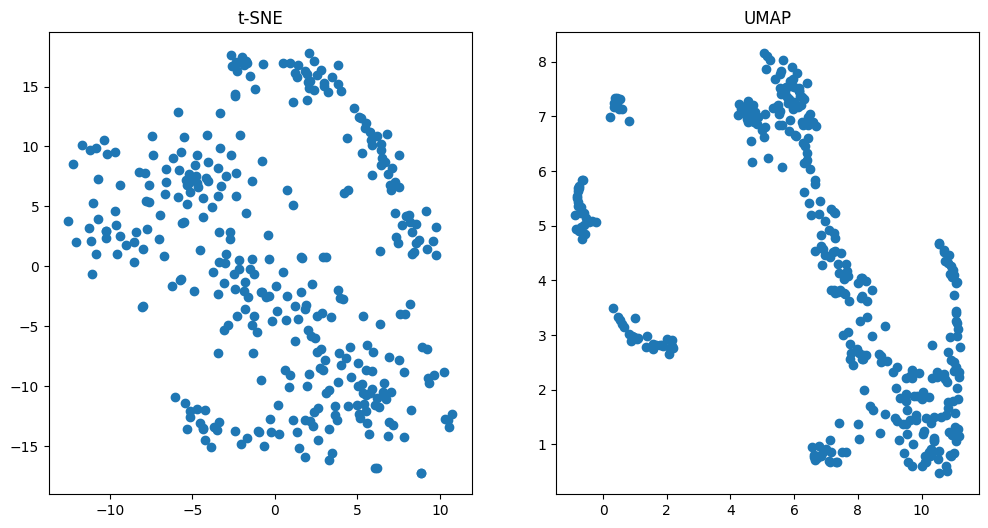

In [ ]:
plot(X_mm)

StandardScaler масштабирование

In [ ]:
sc = StandardScaler()

X_sc = sc.fit_transform(X)

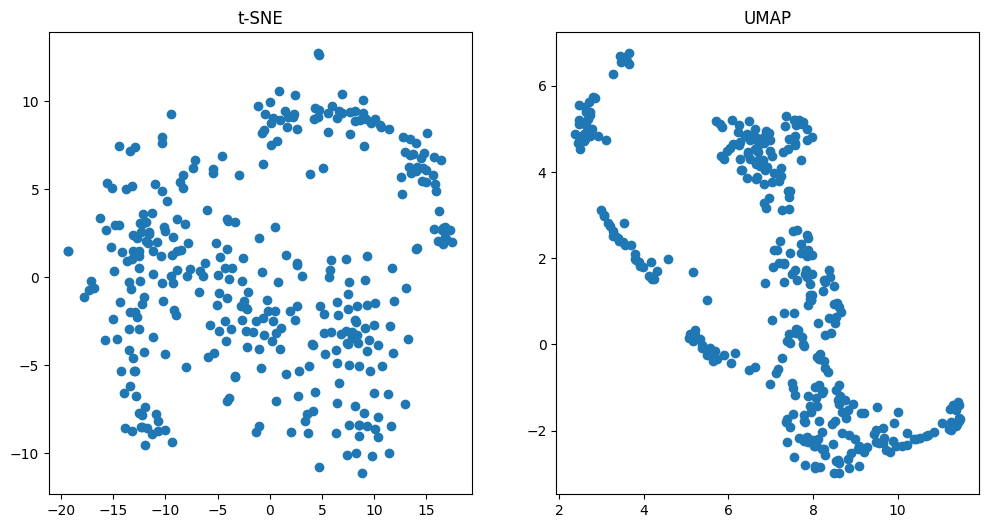

In [ ]:
plot(X_sc)

Robust масштабирование

In [ ]:
robust = RobustScaler()

X_robust = robust.fit_transform(X)

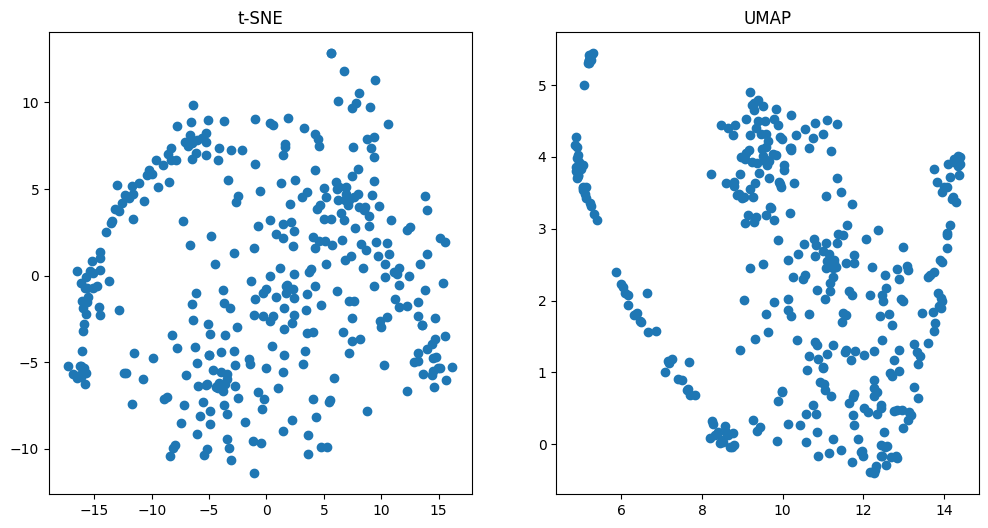

In [ ]:
plot(X_robust)

## Сравнительный анализ масштабирования

In [ ]:
# Применение t-SNE для снижение размерности исходных данных
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

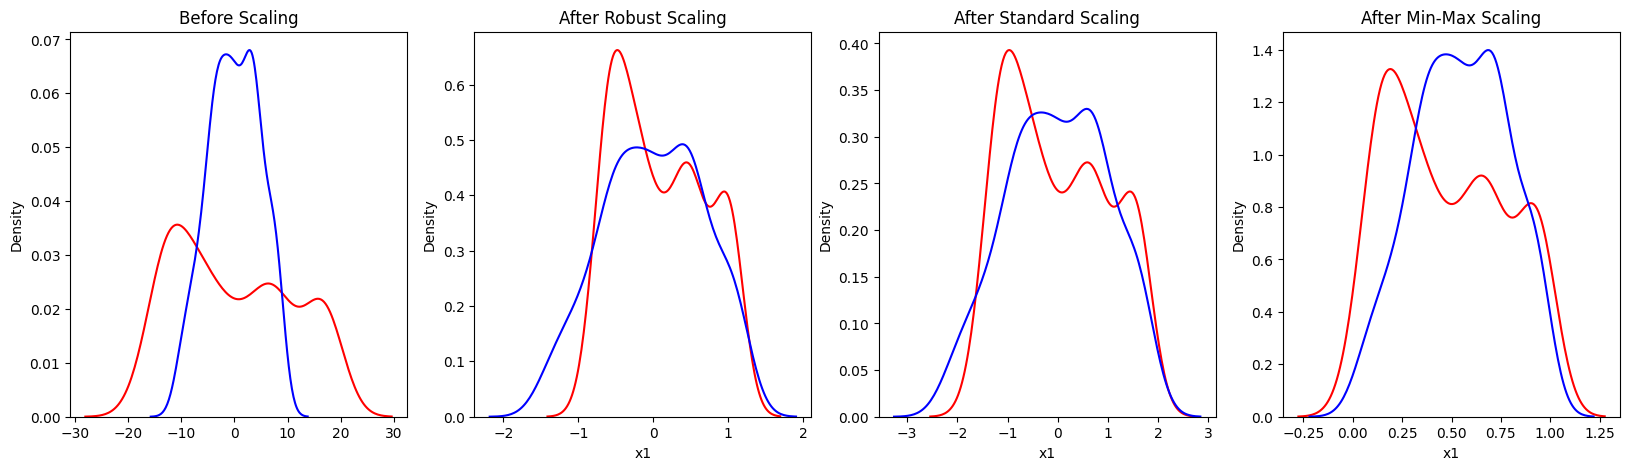

In [ ]:
scaler = RobustScaler()
robust_df = scaler.fit_transform(X_tsne)

robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = StandardScaler()
standard_df = scaler.fit_transform(X_tsne)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(X_tsne)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(X_tsne[:, 0], ax = ax1, color ='r')
sns.kdeplot(X_tsne[:, 1], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['x1'], ax = ax3, color ='red')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='blue')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['x1'], ax = ax4, color ='red')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='blue')

plt.show()

x1 - красная линия

x2 - синяя линия